In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel

pd.options.display.max_columns = None
pd.options.display.max_rows = None

warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

Read the new DataFrame

In [4]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("HourlyDetails (Unboosted).csv")  

In [5]:
print(len(df))
print(len(df[df["No_of_Cars"]<10]))
#print(len(df[df["isHoliday?"]==1])*100/len(df))

94392
16560


In [6]:
df = df[:90888]
#df = df[df["Tolls"]!="--"]
df = df[df["No_of_Cars"]>15]
#90889


In [7]:
df.tail()

,Date,StartTime,EndTime,No_of_Cars,DayOfWeek,Weekend?,isHoliday?,Month,Day,Year,Tolls,Tollname_Dublin Tunnel,Tollname_Eastlink,Tollname_Limerick Tunnel,Tollname_M1,Tollname_M3,Tollname_M4,Tollname_M50,Tollname_M7-M8,Tollname_M8,Tollname_N25,Tollname_N6
90873,17-12-2019,9,10,940,2,0,0,1.602699,0.144222,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0
90874,17-12-2019,10,11,609,2,0,0,1.602699,0.144222,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0
90875,17-12-2019,11,12,655,2,0,0,1.602699,0.144222,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0
90876,17-12-2019,12,13,615,2,0,0,1.602699,0.144222,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0
90877,17-12-2019,13,14,587,2,0,0,1.602699,0.144222,2019,Limerick Tunnel,0,0,1,0,0,0,0,0,0,0,0


### MODEL

In [8]:
# day of week ois important
# not keep isHoliday ---- 141.49
# keep isHoliday ---- 141.08
# Hyper parameter tuning ---- 141.06
df_x = df.drop(["No_of_Cars", "Date", "Tolls"],axis=1)
df_y = df["No_of_Cars"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.80, random_state=100)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


Using TensorFlow backend.


In [11]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [32]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.0005)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [33]:
model = build_model()

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                640       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [35]:
#model.predict(x_test)

In [36]:
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=10)

history = model.fit(  x_train.values, y_train.values,
                      epochs=EPOCHS, validation_split = 0.10, verbose=1,
                      callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Train on 52982 samples, validate on 5887 samples
Epoch 1/1000
52768/52982 [============================>.] - ETA: 0s - loss: 576658.9954 - mean_absolute_error: 542.9734 - mean_squared_error: 576658.8125
Epoch: 0, loss:577326.9919,  mean_absolute_error:543.2557,  mean_squared_error:577326.8125,  val_loss:528535.1048,  val_mean_absolute_error:535.7224,  val_mean_squared_error:528534.8750,  
52982/52982 [==============================] - 4s 84us/sample - loss: 577326.9919 - mean_absolute_error: 543.2557 - mean_squared_error: 577326.8125 - val_loss: 528535.1048 - val_mean_absolute_error: 535.7224 - val_mean_squared_error: 528534.8750
Epoch 2/1000
52982/52982 [==============================] - 5s 86us/sample - loss: 528633.3149 - mean_absolute_error: 508.1053 - mean_squared_error: 528633.5000 - val_loss: 451386.6902 - val_mean_absolute_error: 434.5540 - val_mean_squared_error: 451386.7500
Epoch 3/1000
52982/52982 [==============================] - 5s 86us/sample - loss: 466502.0200 - mean_a

Epoch 63/1000
52982/52982 [==============================] - 6s 114us/sample - loss: 45177.7765 - mean_absolute_error: 145.8849 - mean_squared_error: 45177.7734 - val_loss: 37656.3896 - val_mean_absolute_error: 134.0237 - val_mean_squared_error: 37656.3945
Epoch 64/1000
52982/52982 [==============================] - 6s 107us/sample - loss: 44510.7575 - mean_absolute_error: 144.6384 - mean_squared_error: 44510.7734 - val_loss: 47316.7375 - val_mean_absolute_error: 167.8981 - val_mean_squared_error: 47316.7383
Epoch 65/1000
52982/52982 [==============================] - 6s 114us/sample - loss: 44111.8820 - mean_absolute_error: 144.1945 - mean_squared_error: 44111.8789 - val_loss: 34698.8257 - val_mean_absolute_error: 127.2951 - val_mean_squared_error: 34698.8242
Epoch 66/1000
52982/52982 [==============================] - 6s 108us/sample - loss: 43653.6302 - mean_absolute_error: 143.7014 - mean_squared_error: 43653.6406 - val_loss: 51054.9392 - val_mean_absolute_error: 157.6548 - val_mea

Epoch 95/1000
52982/52982 [==============================] - 6s 110us/sample - loss: 35446.6300 - mean_absolute_error: 128.0769 - mean_squared_error: 35446.6250 - val_loss: 45037.9147 - val_mean_absolute_error: 147.5711 - val_mean_squared_error: 45037.9180
Epoch 96/1000
52982/52982 [==============================] - 5s 101us/sample - loss: 35267.5040 - mean_absolute_error: 127.7981 - mean_squared_error: 35267.5039 - val_loss: 24575.7014 - val_mean_absolute_error: 103.6809 - val_mean_squared_error: 24575.6953
Epoch 97/1000
52982/52982 [==============================] - 6s 110us/sample - loss: 35408.6746 - mean_absolute_error: 127.9668 - mean_squared_error: 35408.6836 - val_loss: 43483.7915 - val_mean_absolute_error: 151.7609 - val_mean_squared_error: 43483.8047
Epoch 98/1000
52982/52982 [==============================] - 7s 129us/sample - loss: 35027.5821 - mean_absolute_error: 127.3899 - mean_squared_error: 35027.5859 - val_loss: 27855.4979 - val_mean_absolute_error: 120.1972 - val_mea

Epoch 157/1000
52982/52982 [==============================] - 6s 115us/sample - loss: 27967.3680 - mean_absolute_error: 111.2164 - mean_squared_error: 27967.3613 - val_loss: 20761.0568 - val_mean_absolute_error: 92.4098 - val_mean_squared_error: 20761.0566
Epoch 158/1000
52982/52982 [==============================] - 6s 113us/sample - loss: 27647.8280 - mean_absolute_error: 111.0405 - mean_squared_error: 27647.8477 - val_loss: 21651.1343 - val_mean_absolute_error: 101.7855 - val_mean_squared_error: 21651.1289
Epoch 159/1000
52982/52982 [==============================] - 6s 113us/sample - loss: 27725.7960 - mean_absolute_error: 111.1879 - mean_squared_error: 27725.7910 - val_loss: 26625.5705 - val_mean_absolute_error: 112.2607 - val_mean_squared_error: 26625.5762
Epoch 160/1000
52982/52982 [==============================] - 6s 117us/sample - loss: 27855.9299 - mean_absolute_error: 111.2033 - mean_squared_error: 27855.9336 - val_loss: 47158.6323 - val_mean_absolute_error: 158.2077 - val_

Epoch 189/1000
52982/52982 [==============================] - 6s 115us/sample - loss: 25400.1909 - mean_absolute_error: 105.9831 - mean_squared_error: 25400.1992 - val_loss: 21703.8376 - val_mean_absolute_error: 94.7920 - val_mean_squared_error: 21703.8379
Epoch 190/1000
52982/52982 [==============================] - 6s 114us/sample - loss: 25368.8799 - mean_absolute_error: 105.6642 - mean_squared_error: 25368.8711 - val_loss: 23634.8943 - val_mean_absolute_error: 114.3660 - val_mean_squared_error: 23634.8945
Epoch 191/1000
52982/52982 [==============================] - 6s 114us/sample - loss: 25252.9275 - mean_absolute_error: 105.5370 - mean_squared_error: 25252.9414 - val_loss: 20010.3981 - val_mean_absolute_error: 94.1187 - val_mean_squared_error: 20010.4023
Epoch 192/1000
52982/52982 [==============================] - 6s 113us/sample - loss: 25225.4775 - mean_absolute_error: 105.4276 - mean_squared_error: 25225.4727 - val_loss: 19759.2030 - val_mean_absolute_error: 94.7227 - val_me

52982/52982 [==============================] - 9s 171us/sample - loss: 21822.7376 - mean_absolute_error: 97.0327 - mean_squared_error: 21822.7559 - val_loss: 48678.6450 - val_mean_absolute_error: 161.5209 - val_mean_squared_error: 48678.6406
Epoch 252/1000
52982/52982 [==============================] - 6s 111us/sample - loss: 21870.6803 - mean_absolute_error: 96.7599 - mean_squared_error: 21870.6973 - val_loss: 18891.3000 - val_mean_absolute_error: 93.6106 - val_mean_squared_error: 18891.3027
Epoch 253/1000
52982/52982 [==============================] - 6s 111us/sample - loss: 21982.1358 - mean_absolute_error: 96.7562 - mean_squared_error: 21982.1211 - val_loss: 20190.0420 - val_mean_absolute_error: 97.9235 - val_mean_squared_error: 20190.0391
Epoch 254/1000
52982/52982 [==============================] - 5s 104us/sample - loss: 21897.2551 - mean_absolute_error: 96.7772 - mean_squared_error: 21897.2578 - val_loss: 18779.3037 - val_mean_absolute_error: 85.7370 - val_mean_squared_error: 1

52982/52982 [==============================] - 7s 139us/sample - loss: 20874.2000 - mean_absolute_error: 93.8716 - mean_squared_error: 20874.2051 - val_loss: 21110.7039 - val_mean_absolute_error: 96.7246 - val_mean_squared_error: 21110.7012
Epoch 284/1000
52982/52982 [==============================] - 7s 124us/sample - loss: 20724.3153 - mean_absolute_error: 93.4787 - mean_squared_error: 20724.3223 - val_loss: 19722.7347 - val_mean_absolute_error: 95.1953 - val_mean_squared_error: 19722.7422
Epoch 285/1000
52982/52982 [==============================] - 6s 123us/sample - loss: 20739.9518 - mean_absolute_error: 93.3622 - mean_squared_error: 20739.9453 - val_loss: 14685.7809 - val_mean_absolute_error: 75.0519 - val_mean_squared_error: 14685.7812
Epoch 286/1000
52982/52982 [==============================] - 7s 123us/sample - loss: 20595.1645 - mean_absolute_error: 93.5512 - mean_squared_error: 20595.1406 - val_loss: 15633.0623 - val_mean_absolute_error: 80.2389 - val_mean_squared_error: 15

Epoch 314/1000
52982/52982 [==============================] - 5s 101us/sample - loss: 20012.1193 - mean_absolute_error: 90.9539 - mean_squared_error: 20012.1348 - val_loss: 16022.5143 - val_mean_absolute_error: 80.7095 - val_mean_squared_error: 16022.5156
Epoch 315/1000
52982/52982 [==============================] - 5s 102us/sample - loss: 19931.7112 - mean_absolute_error: 90.9291 - mean_squared_error: 19931.7246 - val_loss: 32828.7279 - val_mean_absolute_error: 117.3165 - val_mean_squared_error: 32828.7227
Epoch 316/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 19729.4471 - mean_absolute_error: 90.4130 - mean_squared_error: 19729.4551 - val_loss: 16575.6042 - val_mean_absolute_error: 82.5883 - val_mean_squared_error: 16575.6016
Epoch 317/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 19758.5252 - mean_absolute_error: 90.3891 - mean_squared_error: 19758.5234 - val_loss: 17155.8638 - val_mean_absolute_error: 86.6750 - val_mean_s

Epoch 346/1000
52982/52982 [==============================] - 6s 111us/sample - loss: 18879.7815 - mean_absolute_error: 87.6369 - mean_squared_error: 18879.7676 - val_loss: 18685.4898 - val_mean_absolute_error: 89.2756 - val_mean_squared_error: 18685.4922
Epoch 347/1000
52982/52982 [==============================] - 5s 101us/sample - loss: 18968.5324 - mean_absolute_error: 87.3668 - mean_squared_error: 18968.5312 - val_loss: 16689.8343 - val_mean_absolute_error: 82.9740 - val_mean_squared_error: 16689.8340
Epoch 348/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 18858.0137 - mean_absolute_error: 87.8509 - mean_squared_error: 18858.0137 - val_loss: 18067.3201 - val_mean_absolute_error: 91.6223 - val_mean_squared_error: 18067.3164
Epoch 349/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 18903.0359 - mean_absolute_error: 87.4627 - mean_squared_error: 18903.0449 - val_loss: 15454.5396 - val_mean_absolute_error: 82.3409 - val_mean_sq

Epoch 378/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 18012.8457 - mean_absolute_error: 85.2663 - mean_squared_error: 18012.8379 - val_loss: 16158.8647 - val_mean_absolute_error: 78.1715 - val_mean_squared_error: 16158.8643
Epoch 379/1000
52982/52982 [==============================] - 5s 99us/sample - loss: 18120.9288 - mean_absolute_error: 84.9328 - mean_squared_error: 18120.9258 - val_loss: 13955.9449 - val_mean_absolute_error: 73.5616 - val_mean_squared_error: 13955.9492
Epoch 380/1000
52982/52982 [==============================] - 5s 99us/sample - loss: 18035.1701 - mean_absolute_error: 84.9425 - mean_squared_error: 18035.1758 - val_loss: 17597.2474 - val_mean_absolute_error: 92.1486 - val_mean_squared_error: 17597.2500
Epoch 381/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 17921.6870 - mean_absolute_error: 84.5944 - mean_squared_error: 17921.7051 - val_loss: 15704.2787 - val_mean_absolute_error: 84.4047 - val_mean_squa

Epoch 409/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 17375.0824 - mean_absolute_error: 82.9332 - mean_squared_error: 17375.0898 - val_loss: 14631.6259 - val_mean_absolute_error: 72.0742 - val_mean_squared_error: 14631.6240
Epoch 410/1000
52982/52982 [==============================] - 5s 100us/sample - loss: 17271.4380 - mean_absolute_error: 82.6354 - mean_squared_error: 17271.4395 - val_loss: 25178.5066 - val_mean_absolute_error: 99.5235 - val_mean_squared_error: 25178.5078
Epoch 411/1000
52982/52982 [==============================] - 5s 101us/sample - loss: 17378.5379 - mean_absolute_error: 82.9816 - mean_squared_error: 17378.5352 - val_loss: 16754.2501 - val_mean_absolute_error: 86.3805 - val_mean_squared_error: 16754.2539
Epoch 412/1000
52982/52982 [==============================] - 5s 101us/sample - loss: 17364.7188 - mean_absolute_error: 82.7149 - mean_squared_error: 17364.7305 - val_loss: 12666.1180 - val_mean_absolute_error: 67.7479 - val_mean_sq

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
420,17300.106104,82.424973,17300.107422,15285.970015,80.531349,15285.968750,420
421,17185.286742,82.225739,17185.298828,15817.497735,81.338860,15817.501953,421
422,17221.829413,82.000664,17221.810547,19366.788538,89.615150,19366.791016,422
423,17277.827778,82.224739,17277.839844,18634.521180,87.591118,18634.521484,423
424,17322.276672,82.191887,17322.275391,14378.245106,71.760216,14378.246094,424


In [38]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [44]:
hist.mean_squared_error.min()

17145.099609375

Text(0, 0.5, 'MSE ')

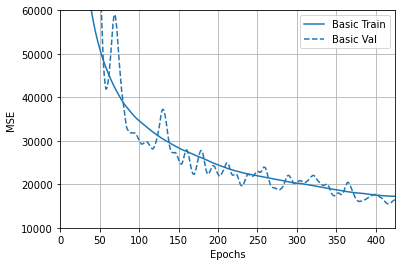

In [52]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([10000, 60000])
plt.ylabel('MSE ')

In [1]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

NameError: name 'model' is not defined

In [ ]:
ypred = model.predict(x_test)

In [ ]:
data = pd.DataFrame(ypred, y_test).reset_index()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data["No_of_Cars"].head(100), label="Actual")
plt.plot(data[0].head(100), label="Predicted")
plt.legend(loc="upper right")
plt.show()

In [ ]:
test = pd.DataFrame(y_test)
pred = pd.DataFrame(ypred)
final = pd.concat([test, pred], axis=1)
test.to_csv("test.csv")
pred.to_csv("pred.csv")
# manually merge the CSVs

In [ ]:
data = pd.read_csv("test.csv")
data = data.set_index('Index')


In [ ]:
merged = pd.merge(left=df, left_index=True,
                  right=data, right_index=True,
                  how='inner')

In [ ]:
merged.head()

In [ ]:
final = merged[["Date","Tolls","StartTime","DayOfWeek","isHoliday?","No_of_Cars_y","Predicted"]]

final["Inaccuracy"] = abs(final["No_of_Cars_y"] - final["Predicted"])
final["Precision"] = final["Inaccuracy"]/final["No_of_Cars_y"]

final = final.sort_values("Precision", ascending=False)

#final[(final["Precision"]>1) & (final["No_of_Cars_y"]>10)]

In [ ]:
final.head()

In [ ]:
final.to_csv("RF_Predictions.csv", index=False)
#del(final)
del(test)
del(merged)
del(pred)
del(data)